In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df = df.dropna()

In [5]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [7]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [8]:
df.at[336, 'sex'] = 'FEMALE'

In [9]:
X = pd.get_dummies(data=df.drop('species', axis=1), drop_first=True)

In [10]:
y = df['species']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
random_forest_model = RandomForestClassifier(n_estimators=10, max_features='auto', random_state=101)

In [15]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [16]:
from sklearn.metrics import classification_report, plot_confusion_matrix 

In [17]:
y_pred = random_forest_model.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



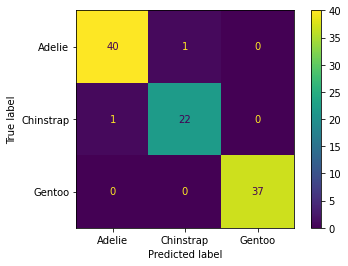

In [19]:
plot_confusion_matrix(estimator=random_forest_model, X=X_test, y_true=y_test)

In [20]:
pd.DataFrame(data=random_forest_model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance')

,importance
island_Torgersen,0.000021
sex_MALE,0.006194
culmen_depth_mm,0.120151
island_Dream,0.139254
body_mass_g,0.148534
flipper_length_mm,0.239263
culmen_length_mm,0.346584


In [21]:
df = pd.read_csv('../DATA/data_banknote_authentication.csv')

In [22]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [23]:
df['Class'].unique()

array([0, 1])

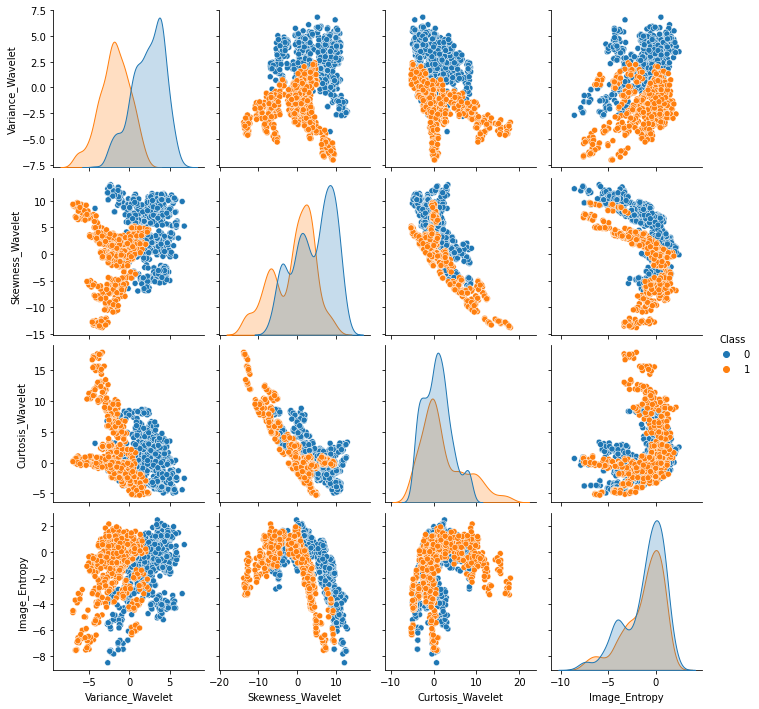

In [24]:
sns.pairplot(data=df, hue='Class')

In [25]:
X = df.drop('Class', axis=1)

In [26]:
y = df['Class']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.15)

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
base_model = RandomForestClassifier()

In [35]:
param_gird = {'n_estimators': [64, 100, 128, 200], 'max_features': np.arange(2, 5), 'bootstrap': [True, False], 'oob_score': [True, False]}

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
grid_model = GridSearchCV(estimator=base_model, param_grid=param_gird)

In [38]:
grid_model.fit(X_train, y_train)

/home/alllowd/anaconda3/envs/python_ml_datascience_learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/alllowd/anaconda3/envs/python_ml_datascience_learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/alllowd/anaconda3/envs/python_ml_datascience_learning/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/alllowd/anaconda3/envs/python_ml_datascience_learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': array([2, 3, 4]),
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [43]:
grid_model.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': True}

In [44]:
tree_model = RandomForestClassifier(max_features=2, n_estimators=64, oob_score=True)

In [45]:
tree_model.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=64, oob_score=True)

In [46]:
tree_model.oob_score_

0.9948542024013722

In [47]:
y_pred = tree_model.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       124
           1       0.99      1.00      0.99        82

    accuracy                           1.00       206
   macro avg       0.99      1.00      0.99       206
weighted avg       1.00      1.00      1.00       206



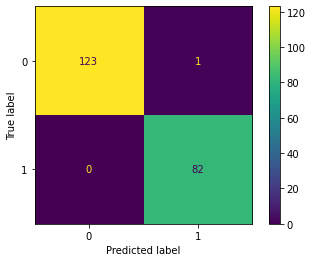

In [49]:
plot_confusion_matrix(tree_model, X_test, y_test)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
x_values = np.arange(1, 200)
error_list = []
misclassifications = []

for n in x_values:
    model = RandomForestClassifier(n_estimators=n, max_features=2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    misclassifications.append((y_pred != y_test).sum())
    error_list.append(1 - accuracy_score(y_test, y_pred))

<AxesSubplot:>

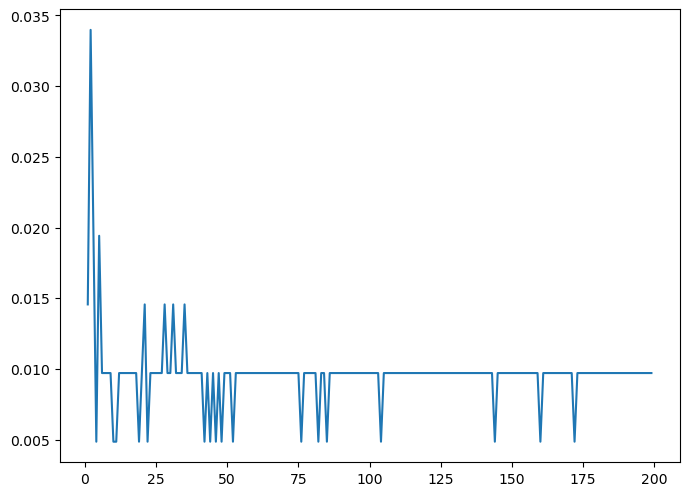

In [52]:
plt.figure(figsize=(8, 6), dpi=100)
sns.lineplot(x=x_values, y=error_list)

<AxesSubplot:>

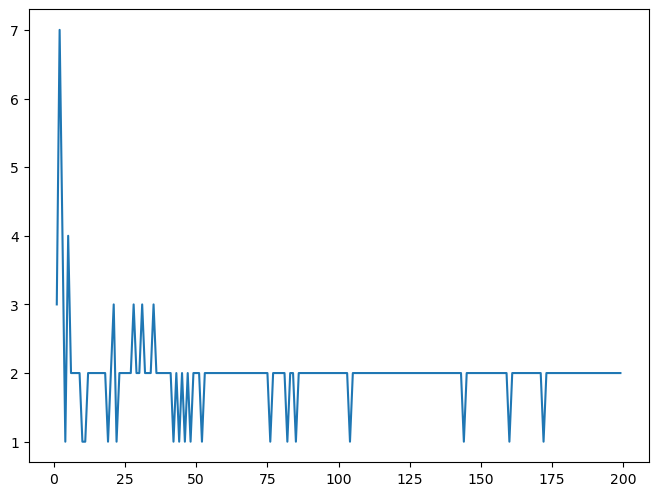

In [53]:
plt.figure(figsize=(8, 6), dpi=100)
sns.lineplot(x=x_values, y=misclassifications)

In [63]:
df = pd.read_csv('../DATA/rock_density_xray.csv')

In [64]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [65]:
df.columns = ['Signal', 'Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

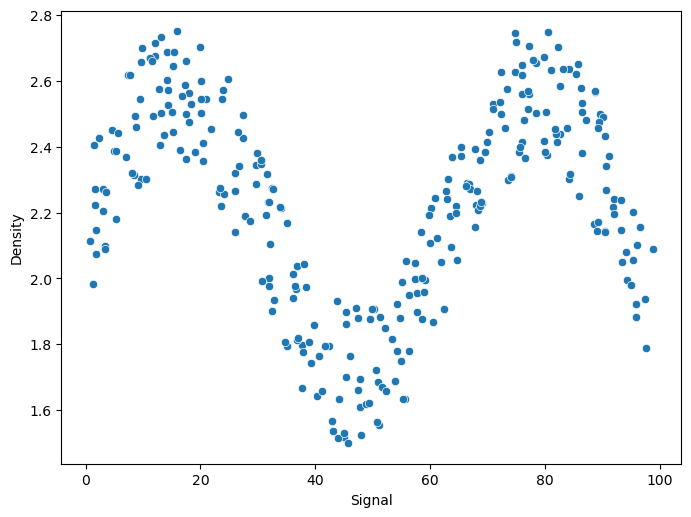

In [66]:
plt.figure(figsize=(8, 6), dpi=100)
sns.scatterplot(data=df, x='Signal', y='Density')

In [67]:
X = df['Signal'].values.reshape(-1, 1)

In [68]:
y = df['Density']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lin_reg_model = LinearRegression()

In [72]:
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = lin_reg_model.predict(X_test)

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [75]:
mean_absolute_error(y_test, y_pred)

0.211198973318633

In [76]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.2570051996584629

In [77]:
def run_model(model, X_train, X_test, y_train, y_test):
    
    plt.figure(figsize=(8, 6), dpi=100)
    signal_range = np.arange(0, 100)
    
    # fit model
    model.fit(X_train, y_train)
    
    # metrics
    y_pred = model.predict(X_test)
    print(f'MAE = {mean_absolute_error(y_test, y_pred)}')
    print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}')
    
    signal_pred = model.predict(signal_range.reshape(-1, 1))

    sns.scatterplot(data=df, x='Signal', y='Density', color='black')
    sns.lineplot(x=signal_range, y=signal_pred)

MAE = 0.211198973318633
RMSE = 0.2570051996584629


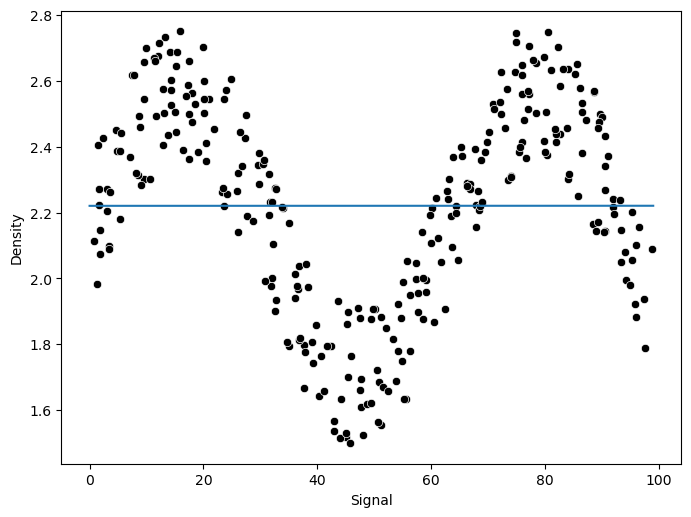

In [78]:
lin_reg_model = LinearRegression()
run_model(lin_reg_model, X_train, X_test, y_train, y_test)

In [79]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [80]:
pipe_model = make_pipeline(PolynomialFeatures(degree=6), StandardScaler(), LinearRegression())

MAE = 0.11969120496970924
RMSE = 0.13807439057345697


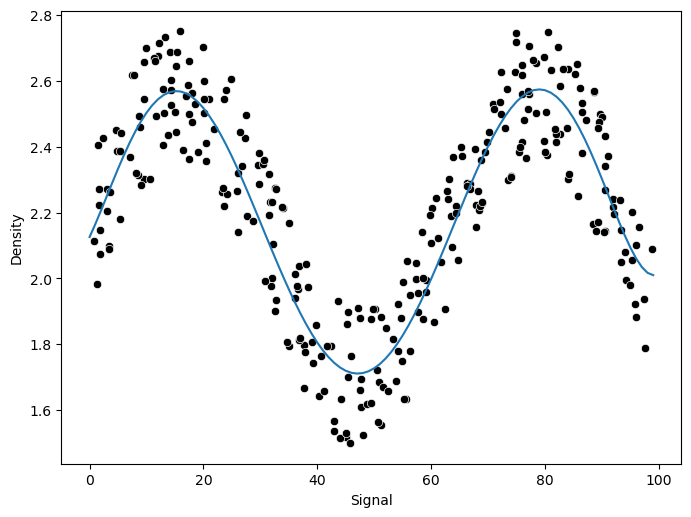

In [81]:
run_model(pipe_model, X_train, X_test, y_train, y_test)

In [82]:
from sklearn.neighbors import KNeighborsRegressor

In [83]:
kneighbor_model = KNeighborsRegressor(n_neighbors=30)

MAE = 0.13363165935705315
RMSE = 0.15954234753677107


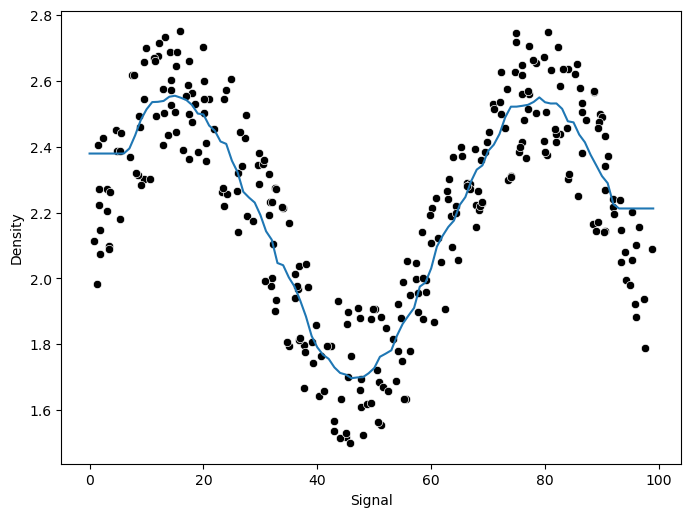

In [84]:
run_model(kneighbor_model, X_train, X_test, y_train, y_test)

MAE = 0.11877297474442382
RMSE = 0.15234870286353372
MAE = 0.12198383614100564
RMSE = 0.13730685016923655
MAE = 0.11635971693292672
RMSE = 0.13277855732740926
MAE = 0.13363165935705315
RMSE = 0.15954234753677107


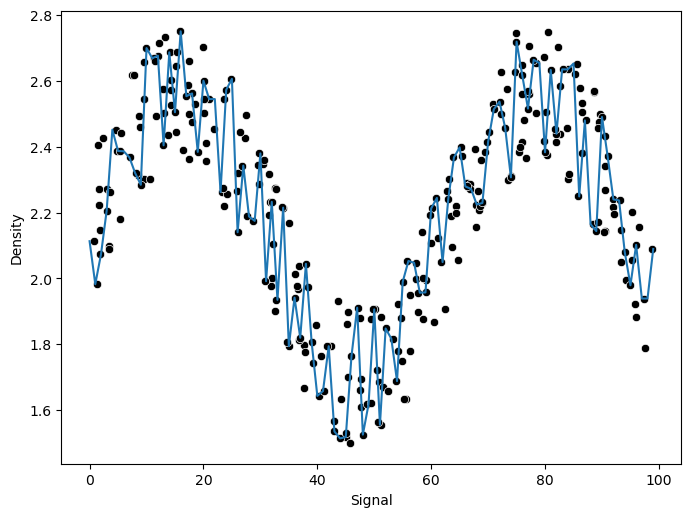

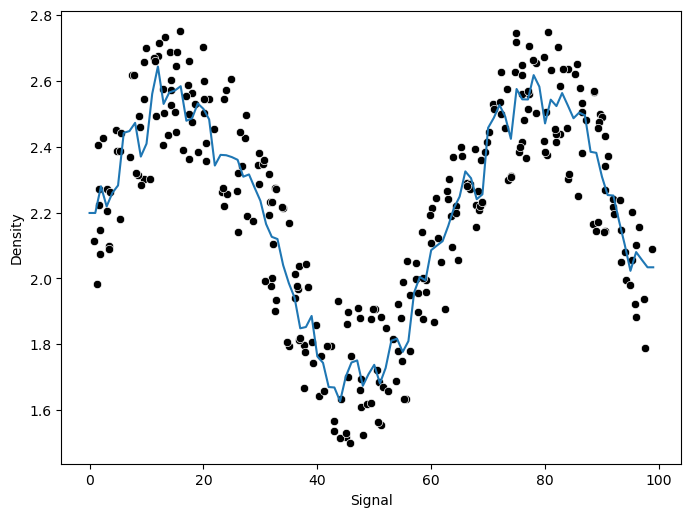

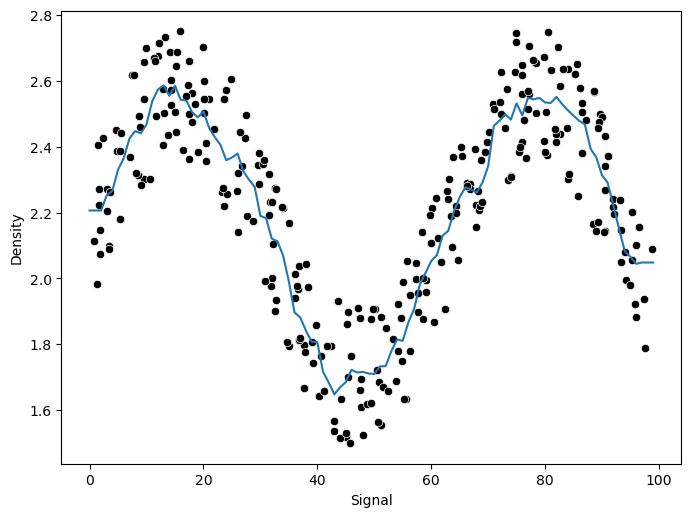

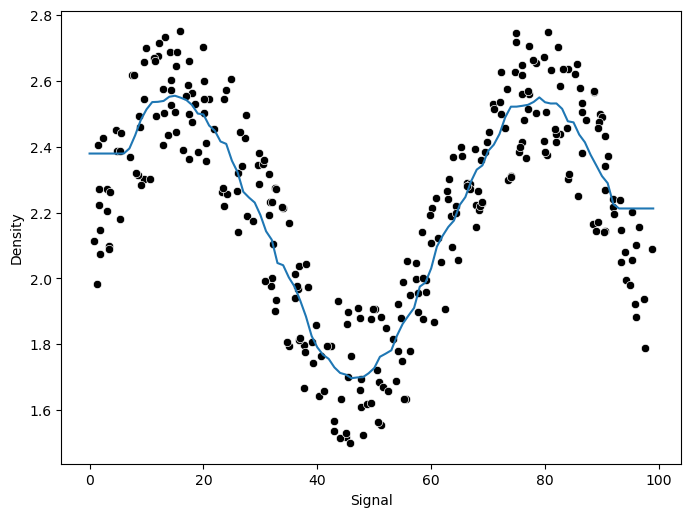

In [85]:
k_values = [1, 5, 10, 30]
mse_error = []

for n in k_values:
    kneighbor_model = KNeighborsRegressor(n_neighbors=n)
    run_model(kneighbor_model, X_train, X_test, y_train, y_test)

In [86]:
from sklearn.tree import DecisionTreeRegressor

In [87]:
tree_model = DecisionTreeRegressor()

MAE = 0.11877297474442382
RMSE = 0.15234870286353372


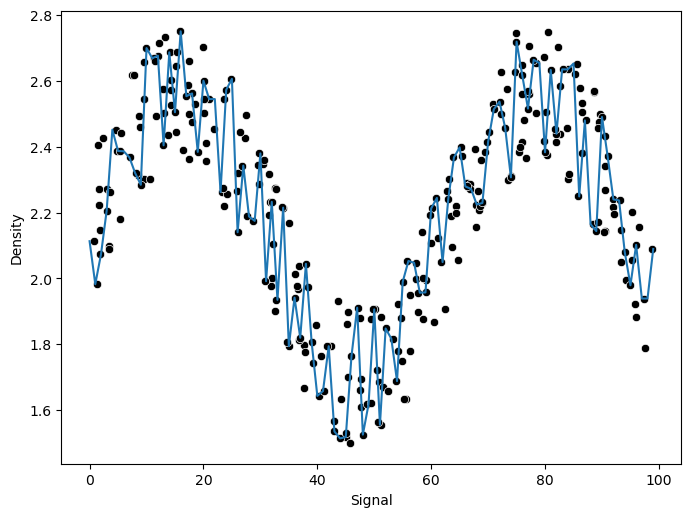

In [161]:
run_model(tree_model, X_train, X_test, y_train, y_test)

In [230]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [231]:
svr = SVR()

In [232]:
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 100, 1000], 'gamma': ['scale', 'auto']}

In [233]:
grid_model = GridSearchCV(svr, param_grid)

MAE = 0.10839253242165772
RMSE = 0.12634668775105407


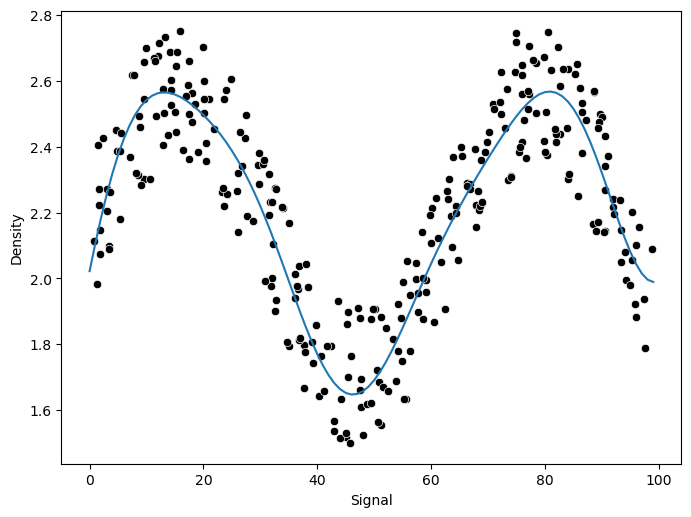

In [234]:
run_model(grid_model, X_train, X_test, y_train, y_test)

In [235]:
grid_model.best_params_

{'C': 1000, 'gamma': 'scale'}

In [236]:
from sklearn.ensemble import RandomForestRegressor

In [237]:
random_reg_model = RandomForestRegressor(n_estimators=10)

MAE = 0.10884189299417973
RMSE = 0.13217861535885883


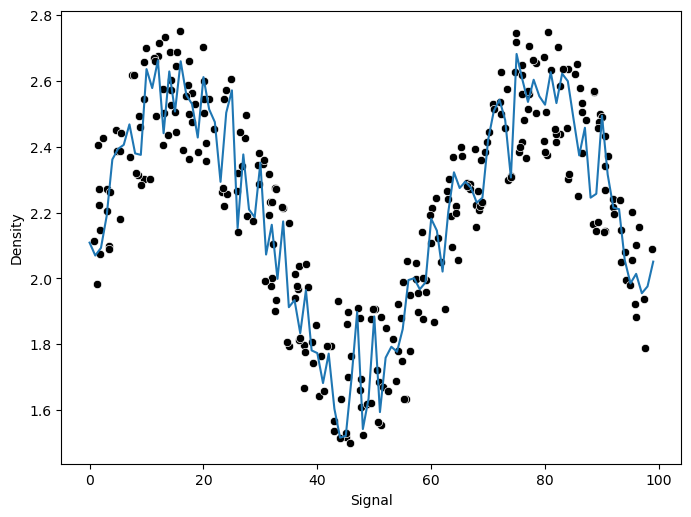

In [238]:
run_model(random_reg_model, X_train, X_test, y_train, y_test)

In [240]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

In [241]:
gradient_model = GradientBoostingRegressor()

MAE = 0.11318284854800689
RMSE = 0.13294148649584667


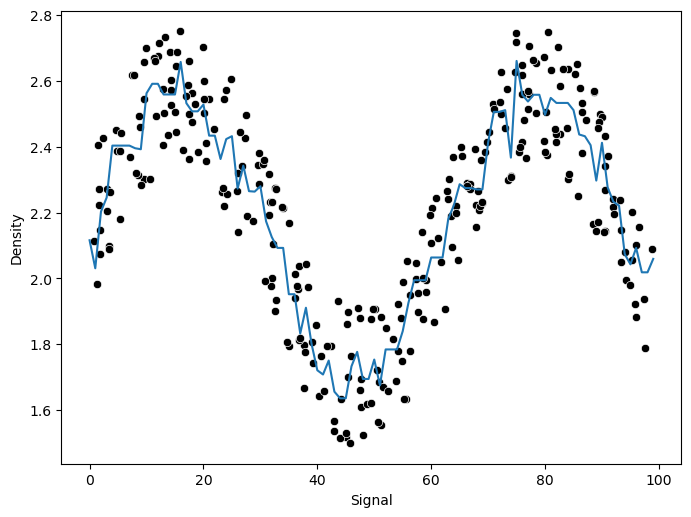

In [243]:
run_model(gradient_model, X_train, X_test, y_train, y_test)

In [246]:
ada_model = AdaBoostRegressor()

MAE = 0.1209304905019171
RMSE = 0.13761911485470305


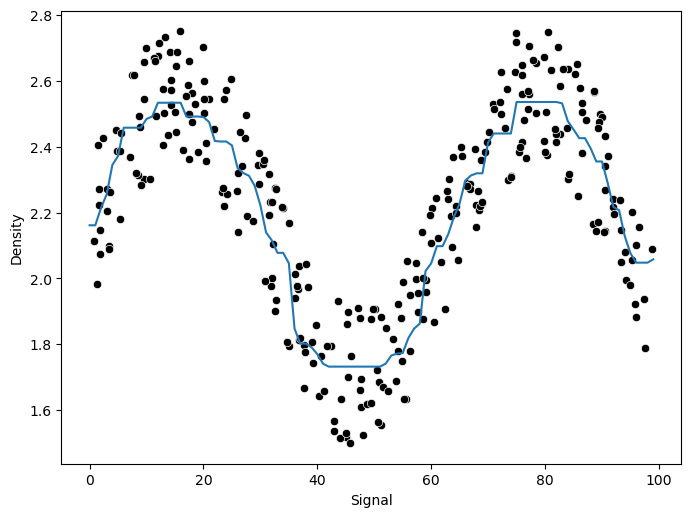

In [247]:
run_model(ada_model, X_train, X_test, y_train, y_test)